In [2]:
# i dati sono stati presi da
# https://github.com/pynbody/genetic_example/blob/main/tutorial.ipynb

import numpy as np
import matplotlib.pyplot as plt
import pynbody

In [3]:
resolution = 512
size_fov   = 1

#-----------------------------------------
# "carica" un file; in realta la maggior parte dei dati (e.g. posizione delle particelle, densita delle particelle, etc) sono caricati su richiesta (qui, quando si chiama pynbody.plot.sph.image)
example_snapshot = pynbody.load(".data/other_data/342447.hdf5")
# conversione in unita fisiche
example_snapshot.physical_units()

#-----------------------------------------
# scrivi alcune proprieta utili dello snapshot della simulazione
print("snapshot properties        ",example_snapshot.properties)
# scrive che tipi di dati sono contenuti nella simulazione, di solito dm (materia oscura), gas, e star (stelle)
print("avaiable types             ",example_snapshot.families())
# scrive le variabili per la materia oscura che sono contenute nell file .hdf5
print()
print("dm fields can be loaded    ",example_snapshot.gas.loadable_keys())
# scrive le variabili che potrebbero essere derivate dalle unita contenute nel file; 
print("dm fields that are defined ",example_snapshot.gas.all_keys())

#-----------------------------------------

snapshot properties         {'a': np.float64(0.9999999999999998), 'omegaB0': np.float64(0.0486), 'omegaM0': np.float64(0.3089), 'omegaL0': np.float64(0.6911), 'boxsize': Unit("5.17e+04 kpc"), 'h': np.float64(0.6774), 'time': Unit("1.41e+01 kpc s km**-1"), 'MassTable': array([0.00000000e+00, 3.07367709e-05, 0.00000000e+00, 5.73879010e-06,
       0.00000000e+00, 0.00000000e+00]), 'Redshift': np.float64(2.220446049250313e-16), 'SubfindID_This_Snapshot': np.int32(342447), 'TracerLength': array([5687533, 1320702,    1813]), 'UnitLength_in_cm': np.float64(3.085678e+21), 'UnitMass_in_g': np.float64(1.989e+43), 'UnitVelocity_in_cm_per_s': np.float64(100000.0)}
avaiable types              [<Family gas>, <Family dm>, <Family star>, <Family bh>]

dm fields can be loaded     ['SubfindID', 'Xray_Emission_03_2keV_C', 'RotatedCenterOfMass', 'MH2GK', 'SubfindVelDisp', 'Xray_Emission_Line_CVI', 'Xray_Emission_Line_NVII', 'CenterOfMass', 'rho', 'SubfindHsml', 'mass', 'Xray_Emission_Line_CV', 'GFM_WindDM

/home/tmassagl/development/pynbody/.venv/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:686: UserWarning: Unable to find cosmological factors in HDF file; assuming position is 3.09e+21 a h**-1
  warnings.warn("Unable to find cosmological factors in HDF file; assuming position is %s" % dist_unit)
/home/tmassagl/development/pynbody/.venv/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:691: UserWarning: Unable to find cosmological factors in HDF file; assuming velocity is 1.00e+05 a**1/2
  warnings.warn("Unable to find cosmological factors in HDF file; assuming velocity is %s" % vel_unit)
/home/tmassagl/development/pynbody/.venv/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:449: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


In [3]:
len(example_snapshot.gas.loadable_keys()), len(example_snapshot.gas.all_keys())

(50, 152)

In [4]:
example_snapshot.dm

<FamilySubSnap "other_data/342447.hdf5::dm" len=7629722>

In [5]:
# chiede la creazione di una mappa di densita, dentro sono impacchettate molte operazioni
# map_out = pynbody.plot.sph.image(
#                                    # seleziona la materia oscura
#                                    example_snapshot.dm
#                                    # prende un campo di vista quadrato da 70 Mpc (centrato sulla coordinata 0,0); Mpc e' 10^6 pc, con pc parsec, unita di distanza comune in astrofisica (circa 3.e18 centimetri)
#                                  , width= str(size_fov)+" Mpc"
#                                    # chiede di plottare la densita, che sara mediata lungo la linea di vista
#                                  , qty="rho"
#                                    # chiede di mediare uniformemente la qty selezionata
#                                  , av_z=None
#                                    # setta le unita fisiche della densita (massa/volume); Msol e' una massa solare, unita abbastanza comoda, kpc sono 1.e3kpc
#                                  , units="Msol kpc^-3"
#                                    # setta la risoluzione della mappa (qui 512x512)
#                                  , resolution=resolution
#                                    # set interni per matplotlib (una istanza di plt.fig() viene inizializzata internamente)
#                                  , cmap="inferno",noplot=False
#                                  )
# plt.show()

In [6]:
pynbody.analysis.halo.center(example_snapshot)

/home/tmassagl/development/pynbody/.venv/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:469: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


<Transformation translate, offset_velocity>

In [7]:
example_snapshot.rotate_y(120)

<Transformation rotate_y(120)>

In [8]:
example_snapshot.rotate_x(-50)

<Transformation rotate_x(-50)>

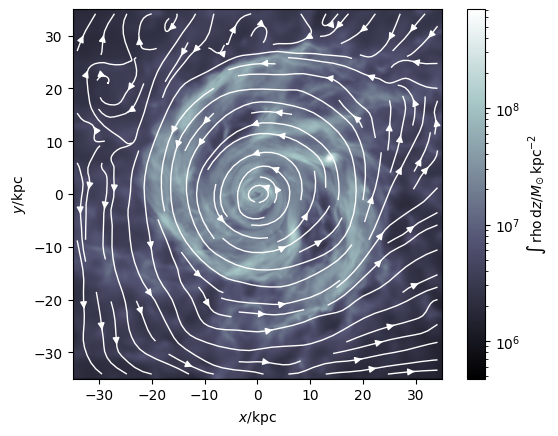

In [9]:
with pynbody.analysis.faceon(example_snapshot):
    pynbody.plot.sph.velocity_image(example_snapshot.gas, qty='rho', width="70 kpc", cmap="bone", units="Msol kpc^-2", av_z=None,
                                    mode='stream', vector_color='white')


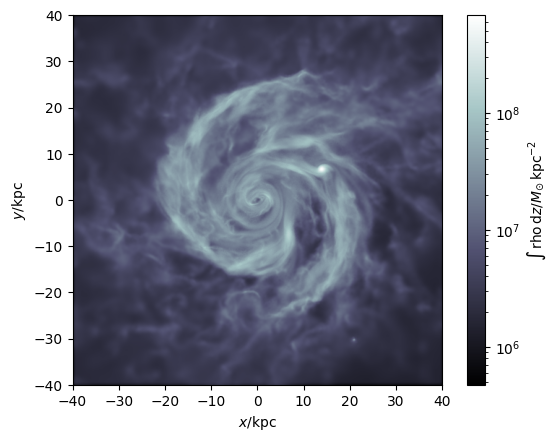

In [13]:
#-----------------------------------------
# chiede la creazione di una mappa di densita, integrando lungo la linea di vista
map_out = pynbody.plot.sph.image(
                                   example_snapshot.gas
                                 , width= str(80)+" kpc"
                                 , qty="rho"
                                 , av_z=None
                                   # qui si sta richiedendo implicitamente l'integrazione, cambiando le unita; la densita verra integrata lungo la linea di vista; l'immagine e' piu gradevole                                  
                                 , units="Msol kpc^-2"
                                 , resolution=512
                                 , cmap="bone",noplot=False
                                 )


plt.show()

/home/tmassagl/development/pynbody/.venv/lib/python3.12/site-packages/pynbody/array/__init__.py:361: RuntimeWarning: invalid value encountered in log
  result = super().__array_ufunc__(ufunc, method, *inputs, **kwargs)


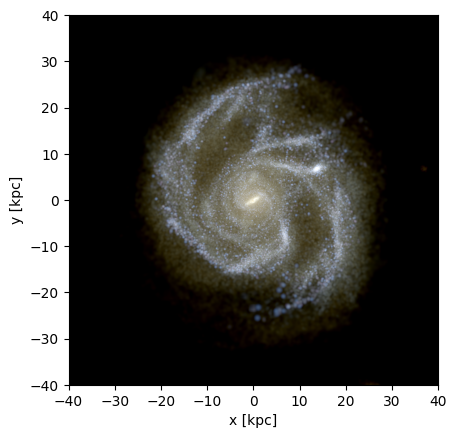

In [11]:
with pynbody.analysis.faceon(example_snapshot):
    pynbody.plot.stars.render(example_snapshot.st, width="80 kpc", with_dust=True, mag_range=[18, 26])